# Sentiment Analysis of Tweets Connected to the UN COP27 Meetings and the Loss and Damage Fund


## Abstract

This paper examines the public sentiment towards the UN Climate Change Conference (COP27) held in Egypt in November 2022 and the newly established loss and damage fund. Using sentiment analysis on a collection of relevant tweets, we aim to understand the public's attitude towards the conference's outcomes and the perceived effectiveness of the fund in addressing climate change.


## Introduction

Climate change is an existential threat, and efforts to address this crisis have gained global attention in recent years. One such effort is the United Nations Climate Change Conference (COP27) to be held in Egypt from November 6 to November 20, 2022. This conference brings together more than 200 countries to discuss strategies to mitigate the effects of climate change and support vulnerable countries. Given the great public interest in this event, the purpose of this paper is to analyze the public sentiment towards COP27 and the Loss and Damage Fund established during the conference.

The primary research question for this project is: What are the sentiments expressed by the public towards the UN COP27 meetings on Twitter? The secondary research question for this project is: How does the public perceive the loss and damage fund established during COP27, which aims to support poor nations suffering due to climate change?

Our assumption is that the sentiment expressed on Twitter about COP27 and the Fund will be predominantly positive due to the recognition of the importance of addressing climate change. However, we also acknowledge that there is a potential for criticism and negative sentiment due to the perceived inadequacy of the outcomes of the conference.

Understanding public sentiment about the COP27 meeting and the Loss and Damage Fund is critical for a variety of reasons. First, it provides insight into the level of public engagement and awareness of climate change issues. Second, it allows stakeholders to gauge public attitudes toward international efforts to address climate change. Finally, it helps to inform future climate policy and communication strategies by identifying areas of public support or skepticism.

The loss and damage fund is a significant outcome of COP27, as it signifies the acknowledgment of developed countries in the need to support developing nations suffering from climate change impacts. The fund has been hailed as a step towards justice by UN Secretary-General António Guterres and offers hope to vulnerable populations for recovery and rebuilding (Huq & Singh, 2022). However, the details of the fund's operation have been left to future discussions, potentially leading to uncertainty and mixed sentiments.

In this paper, we will present the methodology and results of our sentiment analysis on tweets connected to the UN COP27 meetings and the loss and damage fund. We will discuss the implications of the findings and offer recommendations for future climate policy and communication strategies.


## Methods


# Data collection:

To collect Twitter data for this project, we utilized the Twitter API and the twarc2 library, a command line tool and Python library designed for archiving Twitter data. We targeted tweets that included the following hashtags: #COP27, #Climatechange, #Climateaction, and #energy. Additionally, we searched for tweets containing the keywords: COP27, Climate action, Climate change, energy, and loss and damage fund. Our data collection was divided into three stages:

Before COP27: 11/03/2022 - 11/05/2022

During COP27: 11/06/2022 - 11/20/2022

After COP27: 11/21/2022 - 11/23/2022


# Renaming and selecting columns:

We first renamed the columns in the DataFrame 'tweets_df' to make them more understandable and easier to work with:

'created_at' to 'date'

'public_metrics.retweet_count' to 'retweets'

'author.username' to 'username'

'author.name' to 'name'

'author.verified' to 'verified'

'public_metrics.like_count' to 'likes'

'public_metrics.quote_count' to 'quotes'

'public_metrics.reply_count' to 'replies'

'author.description' to 'user_bio'

Next, we selected only the necessary columns for our analysis, which included 'date', 'username', 'name', 'verified', 'text', 'retweets', 'likes', 'replies', 'quotes', and 'user_bio'.


In [1]:
%pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [2]:
import csv
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Initialize VADER so we can use it later
sentimentAnalyser = SentimentIntensityAnalyzer()
import pandas as pd
pd.options.display.max_colwidth = 400

In [3]:
tweets_df = pd.read_csv('kunkun.csv', delimiter=",", header=0)

C:\Users\zhang\AppData\Local\Temp\ipykernel_10304\2518215647.py:1: DtypeWarning: Columns (28,29,39,41,42,43,67,68,69) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_df = pd.read_csv('kunkun.csv', delimiter=",", header=0)


In [4]:
tweets_df.rename(columns={'created_at': 'date',
                          'public_metrics.retweet_count': 'retweets', 
                          'author.username': 'username', 
                          'author.name': 'name',
                          'author.verified': 'verified', 
                          'public_metrics.like_count': 'likes', 
                          'public_metrics.quote_count': 'quotes', 
                          'public_metrics.reply_count': 'replies',
                           'author.description': 'user_bio'},
                            inplace=True)

tweets_df = tweets_df[['date', 'username', 'name', 'verified', 'text', 'retweets',
           'likes', 'replies',  'quotes', 'user_bio']]

tweets_df

,date,username,name,verified,text,retweets,likes,replies,quotes,user_bio
0,2022-11-22T23:59:59.000Z,stlmag,St. Louis Magazine,True,Hanukkah Hullabaloo promises to bring light and energy to The Grandel https://t.co/HcFi1jSyBl,1,2,0,0,"St. Louis Magazine is the smart, stylish, and sophisticated guide to the city. We connect St. Louisans to St. Louis."
1,2022-11-22T23:59:19.000Z,LPNational,Libertarian Party,True,Our energy plan: Abolish the Department of Energy and allow the free market to meet people’s energy needs. https://t.co/UGW4kXjJP4,259,2172,125,29,"America's third-largest political party. We support peace, civil liberties, and free markets!"
2,2022-11-22T23:59:14.000Z,District7PHX,Vice Mayor Yassamin Ansari,True,"Meeting with subnational leaders from around the world, sharing knowledge, &amp; forming relationships is incredibly important in the fight for climate solutions. 🌍\n\nIt was an honor to represent Phoenix at COP27. Thank you for chatting with me, @JakeFrederico!https://t.co/LsJUXjg6Ns",6,10,0,0,"Official account of the Vice Mayor of the fifth-largest, fastest growing city in the country. Climate Leader⚡️Building the Phoenix of the future."
3,2022-11-22T23:59:06.000Z,WSJopinion,Wall Street Journal Opinion,True,"If we in the West are to pay damages for the Industrial Revolution, shouldn’t we also consider the extraordinary wealth that process has helped spread around the world? asks @gerardtbaker\nhttps://t.co/mRoxFWkAJp",2,6,2,1,Opinion & Commentary from The Wall Street Journal.
4,2022-11-22T23:58:16.000Z,BenjaminNorton,Ben Norton,True,Blaming Venezuela for climate change -- breathtakingly ridiculous disinformation from professional Washington-based coup-supporter @GRamsey_LatAm\n\n@WOLA_org is funded by European governments and billionaire CIA cutout foundations to demonize Latin America's anti-imperialist left https://t.co/PIXfAsFRXy https://t.co/OWbiPU0jPE,68,180,8,2,Journalist/periodista || Editor @GeopoliticaEcon https://t.co/rxapIAXXt5 || Videos: https://t.co/nttyf01rBw || English/español
...,...,...,...,...,...,...,...,...,...,...
158133,2022-11-03T00:00:07.000Z,BostonGlobe,The Boston Globe,True,"Tech Lab: A small startup in Woburn called Alsym Energy is working on the need for better, cheaper batteries for cars, electric utilities, and even seagoing ships. https://t.co/pFktd43ube",2,8,0,3,New England's leading source for breaking news and analysis.
158134,2022-11-03T00:00:07.000Z,WTOKTV,WTOK-TV,True,"The money, in part from Biden’s economic rescue plan, will go to heating and utility bill costs and can be used to help families make home energy repairs. https://t.co/j2CoiON5Z2",0,0,1,0,Your news leader for East Mississippi and West Alabama!
158135,2022-11-03T00:00:06.000Z,UniMelb,University of Melbourne,True,Climate change is affecting the health of people around the world. Researchers say transitioning to net-zero emissions could be the greatest health opportunity this century → https://t.co/l8ligtxWRL\n\n#UniMelbPursuit w/ @celia_mcmichael @kathrynjbowen @mark_transport @MCFunimelb https://t.co/i98aJXS3GE,3,5,1,0,"We are a public-spirited institution making distinctive contributions to society in research, learning and teaching and engagement.\n\nCRICOS code: 00116K"
158136,2022-11-03T00:00:02.000Z,StateDept,Department of State,True,".@ClimateEnvoy John Kerry previews the upcoming #COP27: We’re working very closely with all of our allies, with many many countries, and around the world, in order to principally raise climate ambition. That’s the fundamental goal. #ClimateAction https://t.co/oEdo8yWAkH",78,165,65,15,Welcome to the U.S. Department of State Twitter account. Follow @SecBlinken for more from the Secretary. For all Department accounts: https://t.co/kzsNMIOwF9.


# Calculating sentiment scores:

We defined a function named 'calculate_sentiment' that takes a text input and calculates its sentiment score using the VADER sentiment analysis tool. The function returns the compound sentiment score for the input text. We then applied this function to the 'text' column of the DataFrame to create a new column called 'sentiment_score', which contains the sentiment score for each tweet.

In [5]:
def calculate_sentiment(text):
    scores = sentimentAnalyser.polarity_scores(text)
    compound_score = scores['compound']
    return compound_score

In [6]:
tweets_df['sentiment_score'] = tweets_df['text'].apply(calculate_sentiment)
tweets_df

,date,username,name,verified,text,retweets,likes,replies,quotes,user_bio,sentiment_score
0,2022-11-22T23:59:59.000Z,stlmag,St. Louis Magazine,True,Hanukkah Hullabaloo promises to bring light and energy to The Grandel https://t.co/HcFi1jSyBl,1,2,0,0,"St. Louis Magazine is the smart, stylish, and sophisticated guide to the city. We connect St. Louisans to St. Louis.",0.5719
1,2022-11-22T23:59:19.000Z,LPNational,Libertarian Party,True,Our energy plan: Abolish the Department of Energy and allow the free market to meet people’s energy needs. https://t.co/UGW4kXjJP4,259,2172,125,29,"America's third-largest political party. We support peace, civil liberties, and free markets!",0.8591
2,2022-11-22T23:59:14.000Z,District7PHX,Vice Mayor Yassamin Ansari,True,"Meeting with subnational leaders from around the world, sharing knowledge, &amp; forming relationships is incredibly important in the fight for climate solutions. 🌍\n\nIt was an honor to represent Phoenix at COP27. Thank you for chatting with me, @JakeFrederico!https://t.co/LsJUXjg6Ns",6,10,0,0,"Official account of the Vice Mayor of the fifth-largest, fastest growing city in the country. Climate Leader⚡️Building the Phoenix of the future.",0.8395
3,2022-11-22T23:59:06.000Z,WSJopinion,Wall Street Journal Opinion,True,"If we in the West are to pay damages for the Industrial Revolution, shouldn’t we also consider the extraordinary wealth that process has helped spread around the world? asks @gerardtbaker\nhttps://t.co/mRoxFWkAJp",2,6,2,1,Opinion & Commentary from The Wall Street Journal.,-0.0258
4,2022-11-22T23:58:16.000Z,BenjaminNorton,Ben Norton,True,Blaming Venezuela for climate change -- breathtakingly ridiculous disinformation from professional Washington-based coup-supporter @GRamsey_LatAm\n\n@WOLA_org is funded by European governments and billionaire CIA cutout foundations to demonize Latin America's anti-imperialist left https://t.co/PIXfAsFRXy https://t.co/OWbiPU0jPE,68,180,8,2,Journalist/periodista || Editor @GeopoliticaEcon https://t.co/rxapIAXXt5 || Videos: https://t.co/nttyf01rBw || English/español,-0.6908
...,...,...,...,...,...,...,...,...,...,...,...
158133,2022-11-03T00:00:07.000Z,BostonGlobe,The Boston Globe,True,"Tech Lab: A small startup in Woburn called Alsym Energy is working on the need for better, cheaper batteries for cars, electric utilities, and even seagoing ships. https://t.co/pFktd43ube",2,8,0,3,New England's leading source for breaking news and analysis.,0.6124
158134,2022-11-03T00:00:07.000Z,WTOKTV,WTOK-TV,True,"The money, in part from Biden’s economic rescue plan, will go to heating and utility bill costs and can be used to help families make home energy repairs. https://t.co/j2CoiON5Z2",0,0,1,0,Your news leader for East Mississippi and West Alabama!,0.7964
158135,2022-11-03T00:00:06.000Z,UniMelb,University of Melbourne,True,Climate change is affecting the health of people around the world. Researchers say transitioning to net-zero emissions could be the greatest health opportunity this century → https://t.co/l8ligtxWRL\n\n#UniMelbPursuit w/ @celia_mcmichael @kathrynjbowen @mark_transport @MCFunimelb https://t.co/i98aJXS3GE,3,5,1,0,"We are a public-spirited institution making distinctive contributions to society in research, learning and teaching and engagement.\n\nCRICOS code: 00116K",0.7906
158136,2022-11-03T00:00:02.000Z,StateDept,Department of State,True,".@ClimateEnvoy John Kerry previews the upcoming #COP27: We’re working very closely with all of our allies, with many many countries, and around the world, in order to principally raise climate ambition. That’s the fundamental goal. #ClimateAction https://t.co/oEdo8yWAkH",78,165,65,15,Welcome to the U.S. Department of State Twitter account. Follow @SecBlinken for more from the Secretary. For all Department accounts: https://t.co/kzsNMIOwF9.,0.0000


# Sorting tweets by sentiment score:

To gain insights into the tweets with the highest and lowest sentiment scores, we sorted the DataFrame by the 'sentiment_score' column in both ascending and descending order. This allowed us to view the top 10 most positive and negative tweets.

In [7]:
tweets_df.sort_values(by='sentiment_score', ascending=False)[:10]

,date,username,name,verified,text,retweets,likes,replies,quotes,user_bio,sentiment_score
154345,2022-11-03T14:38:52.000Z,ThisIsMax,MAX,True,I haven’t interviewed @selenagomez for a few years but I can tell you this …the energy she gave me .. her kindness fun and genuine love for others was infectious and truly touched me. She is someone that uses her own life experiences to help others. Love her for it! 🖤 💜💚 https://t.co/L1Kgx40nZ9,246,1371,9,2,Presenter/Producer 💁🏽‍♀️ Eyes on the prize Violet! 😜 contact : Management@FlipYourWig.net,0.9948
157101,2022-11-03T07:12:58.000Z,DoaaFarid,Doaa Farid,True,@CallMeInjy تحياتي للكليب 🎉🎉🎉 \nHappiest of birthdays sweet and beautiful joujou🥰🥰 I really love your energy and soul♥️ have fun ya gamila😘😘😘,0,1,1,0,Podcast Lead @TheNationalNews 🎙| Award-winning producer @NYFestivals & ASBU| Prev podcasts @alhurranews Ex News Producer @BBCArabic & @CNBC | Views are mine,0.9944
431,2022-11-22T21:18:39.000Z,AlexGilesNews,Alex Giles WBTV,True,"These two were so talented with what they did every day, but they were even better people. So friendly and so much positive energy. Hug your loved ones tight. We love you, Chip and Jason. https://t.co/GwjZLt420c",86,852,36,14,Anchor/Reporter @WBTV_News. Broadcast Journalism Graduate from @UNC. Former Anchor/Reporter @WECTNews and @CarolinaWeekUNC. GO HEELS!,0.9898
206,2022-11-22T22:34:13.000Z,Maddie_Gardner,Maddie Gardner,True,"Jason Myers was the epitome of positive energy. Always friendly. Always kind. Always willing to help. He was a man of faith - strong faith - and you could see the love of God shine through him. Jason went out of his way to make other people’s days better, easier, and happier. https://t.co/6N5TpSrO4B",5,71,2,1,Corporate communicator. Former journalist. Tar Heel. Lover of exercise & cake.,0.9893
2819,2022-11-22T13:39:31.000Z,PrettyMill1,Stephanie Mills,True,Sending positive and up lifting prayers to my friend and uplifter of people @sinbadbad I love you my brother and friend. All his life he has always given so much love and support to so many. Now we all need to send our energy to our brother. 🙏🏾🙏🏾👏🏾💜✊🏾✊🏾💜💜💪🏾💪🏾💪🏾 https://t.co/hGI9sP1hQk,3402,40736,1342,324,Official Twitter for Grammy Award winning singer and actress Stephanie Mills ❤️ IG: iamstephaniemills. For management and booking Ampharris@gmail.com,0.9892
129190,2022-11-07T12:23:24.000Z,CHAIofficialJPN,CHAI official,True,TEN-KYUUU @PsSaopaulo 🇧🇷❤️\nOur first time in Brazil was sooo EXCITED‼️\nEveryone's energy was powerful🤘🏻💘 AMAZING🥳!!!!!\nWe hope to be back in Brazil again🥰💚💛💚\nLOVE YOU GUYS🌺💓\nObrigada❤︎❤︎❤︎❤︎❤︎❤︎❤︎❤︎❤︎ https://t.co/6myBlnDVHf,37,943,1,88,"WE ARE CHAI ! NEW EP""ジャジャーン""OUT NOW❤️‍🔥",0.9892
15050,2022-11-20T00:14:47.000Z,RachelMiner1,Rachel Miner,True,"Thank you @GISH family for ALWAYS reminding me to lead with creativity and kindness, I am so excited to see where all this beautiful free floating compassionate and creative energy gets channeled next! LOVE YOU ALL BEYOND MEASURE 💕 https://t.co/0SPKbhnt5o",67,861,31,2,Fan of life 🌸-She/Her. Proud ♿️ advocate. Views are my own. INFP Exec Dir https://t.co/mqrBILbSNn,0.9890
27913,2022-11-17T18:48:10.000Z,sathNHS,SaTH,True,"Our next award is the Volunteer of the Year Award. With over 300 volunteers giving their time and energy to support the Trust, this award recognises the outstanding commitment of an individual volunteer.\n\nAND THE WINNER IS....\n\nEthan Holmes! Congratulations 👏\n\n#SaTHAwards https://t.co/KLOWdVnZ1V",3,27,0,1,Shrewsbury and Telford Hospital NHS Trust 🏥 \nAccount not monitored 24/7. We can't always respond to tweets.\n✉️ sath.commsteam@nhs.net,0.9890
119624,2022-11-08T07:00:01.000Z,pulpliveworld,PULP Live World,True,"BINGOs, thank you for welcoming Park Eun Bin with warm energy! Like her wish, we hope your hearts are filled with wonderful memories from this special night.\n\nTo PARK EUN BIN, ‘ang saya saya namin’! We hope to meet you again on a lovely day just like this one! #ParkEunBinInMNL https://t.c

In [8]:
tweets_df.sort_values(by='sentiment_score', ascending=True)[:10]

,date,username,name,verified,text,retweets,likes,replies,quotes,user_bio,sentiment_score
35968,2022-11-16T22:17:51.000Z,MrMatthewTodd,Matthew Todd 🌏🔥,True,"@TheMontyDon I dont like these protests either, but do you understand that climate change may kill us and collapse society? Young people arent going to just sit and wait to die. I imagine they will get angrier and more destructive as they are being destroyed https://t.co/bUqwgpoXvh",0,5,0,0,Award winning writer. Author UK gay shame book ‘Straight Jacket' ('An essential read for every gay person on the planet’ Elton John).,-0.9883
70200,2022-11-13T12:48:41.000Z,Benarasiyaa,Piyush Rai,True,"In UP's Unnao, a woman brutally raped died of excessive bleeding. The accused after consuming energy booster pills forced himself on the victim and later abandoned her in fatal condition. Cause of death- shock and haemorrhage due to excessive bleeding. https://t.co/3ruJesTSCQ",172,261,22,22,Journalist | Tip-offs: rai.piyushkumar@gmail.com,-0.9840
13359,2022-11-20T09:52:35.000Z,steventrent,Steve Trent,True,"The deal on loss &amp; damage at #COP27 is important, but the failure to curb #FossilFuels leaves our world on the brink of a catastrophic global disaster. Without far greater, faster action there is no hope of keeping to 1.5 degrees and we will witness the death of millions.",12,23,1,2,"Founder, CEO, Environmental Justice Foundation. Founder, WildAid. 35 years campaigning for wildlife, environmental security and human rights.",-0.9832
52521,2022-11-15T15:37:05.000Z,ciel_tweets,Center for International Environmental Law,True,But marginalized communities are not only most directly impacted by the fossil economy 😱 &amp; by the effects of #ClimateChange 😱. They are also at heightened risk of harm from certain responses to the #ClimateCrisis 😱 .,1,1,1,0,CIEL defends the right to a healthy planet.\n#HealthyEnvironmentIsARight\nSign up for our newsletters ✒️ https://t.co/u2Ict20GUQ,-0.9832
357,2022-11-22T21:39:19.000Z,AndyOstroy,Andy Ostroy,True,"I don't care about the threats from N Korea, China, Putin. Or the attacks on democracy. Or domestic terrorism. Or stolen top-secret docs. Or climate change. Or gun violence. Or racism, anti-Semitism, transphobia. Nuh-uh...not when #HunterBiden's LAPTOP is such a huge threat...",8,56,3,0,"Proud democrat. Patriot. Writer. Filmmaker/producer (ADRIENNE, HBOMax). Podcaster. Non-profit founder supporting women filmmakers. Drummer. Biker. Candy man.",-0.9815
154729,2022-11-03T13:50:16.000Z,douglaskarr,Douglas Karr,True,"@AP Not a mention of his failed economic policies, failed party policies on crime, failed pursuit of peace, failed energy policy, failed unity… just baseless fear mongering so he can try to blame the House flipping on racism and voter suppression. He’s the worst President ever.",2,20,0,0,"@martech_zone is me without #politics, #digitaltransformation consultant @highbridge_indy, #author #speaker & workshops @dknewmedia, grandfather & #veteran",-0.9810
130398,2022-11-07T10:54:50.000Z,SeabrookClimate,Victoria Seabrook,True,"""This war must stop,"" Egypt President Sisi says in emotive plea at opening of #Cop27\nSays entire world likely suffering because of war between Russia and Ukraine. Egypt suffered from Covid-19 crisis, now from this crisis.",0,0,1,0,"Climate reporter 🌏 @SkyNews, tweeting about #climate #biodiversity, #energy - & sometimes still music. Former news & docs TV producer. Views own. DMs open!",-0.9783
107231,2022-11-09T07:00:21.000Z,UNOHRLLS,UN-OHRLLS,True,The oceans alone are absorbing the heat equivalent of \n\n💥 FIVE \n\n💥 Hiroshima \n\n💥 Atomic \n\n💥 Bombs \n\n💥 dropping \n\n💥 into \n\n💥 the \n\n💥 water \n\n💥 every \n\n💥 second. \n\nFor the most vulnerable – for all of us – climate action now! \n\n#COP27 https://t.co/gMsY5gevo3,0,3,0,0,"We coordinate and advocate for the world's Least Developed Countries, Landlocked Developing Countries and Small Island Developing States.",-0.9763
116511,2022-11-08T11:12:39.000Z,JhessetEnano,J

# Converting and setting the date index:

We converted the 'date' column to a pandas datetime format to facilitate time-based analysis and plotting. We then set the 'date' column as the index of the DataFrame.

In [9]:
tweets_df['date'] = pd.to_datetime(tweets_df['date'])
tweets_df = tweets_df.set_index('date')

In [10]:
tweets_df.head(2)

,username,name,verified,text,retweets,likes,replies,quotes,user_bio,sentiment_score
date,,,,,,,,,,
2022-11-22 23:59:59+00:00,stlmag,St. Louis Magazine,True,Hanukkah Hullabaloo promises to bring light and energy to The Grandel https://t.co/HcFi1jSyBl,1,2,0,0,"St. Louis Magazine is the smart, stylish, and sophisticated guide to the city. We connect St. Louisans to St. Louis.",0.5719
2022-11-22 23:59:19+00:00,LPNational,Libertarian Party,True,Our energy plan: Abolish the Department of Energy and allow the free market to meet people’s energy needs. https://t.co/UGW4kXjJP4,259,2172,125,29,"America's third-largest political party. We support peace, civil liberties, and free markets!",0.8591


# Plotting sentiment scores over time:

Finally, we created a line plot to visualize the mean sentiment scores of the tweets over time, specifically by day. This was achieved using the pandas 'resample' method, which allowed us to calculate the mean sentiment score for each day during the data collection period. The resulting plot provides insights into how the public sentiment towards COP27 and the loss and damage fund evolved throughout the conference and its aftermath.

By employing this code, we effectively processed, analyzed, and visualized the sentiment of tweets related to the COP27 meetings and the loss and damage fund. This enabled us to draw conclusions about public sentiment towards these topics and identify potential areas for future research and policy development.

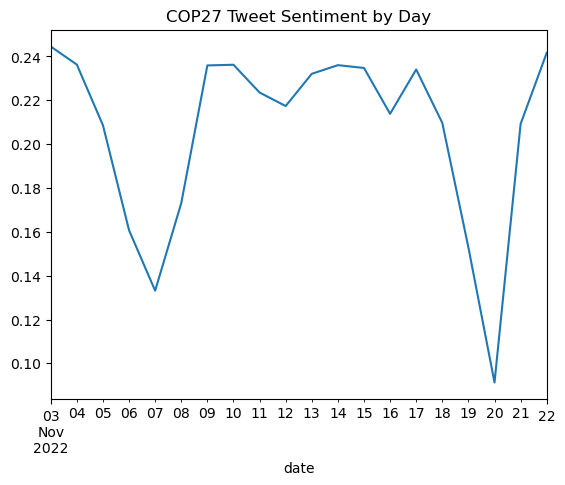

In [13]:
tweets_df.resample('D')['sentiment_score'].mean().plot(
    title="COP27 Tweet Sentiment by Day");

It is important to note that we repeated the data processing and sentiment analysis steps twice. First, we analyzed all the data collected from Twitter. Then, we used Excel to filter tweets containing the keyword "loss and damage fund" and conducted a separate sentiment analysis on this subset of tweets. This approach enabled us to compare the general sentiment towards COP27 with the specific sentiment related to the loss and damage fund. Next is the analysis for the Loss and Damage Fund, because the steps are consistent, we will not repeat the explanation.

Note: I tried to use the code to extract the keyword "loss and damage fund" from the data, but it ran for 20 minutes without any result. We learned how to extract hashtag in class, but considering that many people don't use hashtag when discussing loss and damage fund, I think it is more accurate to search for keywords. I put the code that didn't work here as well.

In [ ]:
# def traverse_special_text(text, standard):
#     if len(standard) <= 0:
#         if len(text) <= 0:
#             return True
#         return False
    
#     start = standard[0]
#     for i in range(len(text)):
#         if text[i] == standard[0]:
#             for j in range(len(standard)):
#                 if i < len(text) and standard[j] == text[i]:
#                     i += 1
#                     j += 1
#                     if j == len(standard):
#                         return True
#                 else:
#                     break

#     return False


In [ ]:
# for i in range(len(tweets_df)):
#     if traverse_special_text(tweets_df.iloc[i, 3], "loss and damage fund"):
#         tweets_df.loc[i, 'judge'] = True
#     else:
#         tweets_df.loc[i, 'judge'] = False

In [14]:
tweets_df_1 = pd.read_excel('Tweets_Loss_and_damage_fund.xlsx', header=0)
tweets_df_1

,id,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,author_id,in_reply_to_user_id,in_reply_to_username,retweeted_user_id,retweeted_username,...,geo.geo.type,geo.id,geo.name,geo.place_id,geo.place_type,matching_rules,__twarc.retrieved_at,__twarc.url,__twarc.version,Unnamed: 83
0,1595185007341060096,1595185007341060096,NaN,NaN,NaN,582953166,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-08T17:37:12+00:00,https://api.twitter.com/2/tweets/search/all?expansions=author_id%2Cin_reply_to_user_id%2Creferenced_tweets.id%2Creferenced_tweets.id.author_id%2Centities.mentions.username%2Cattachments.poll_ids%2Cattachments.media_keys%2Cgeo.place_id%2Cedit_history_tweet_ids&tweet.fields=attachments%2Cauthor_id%2Ccontext_annotations%2Cconversation_id%2Ccreated_at%2Centities%2Cgeo%2Cid%2Cin_reply_to_user_id%2C...,2.13.0,NaN
1,1595182612938710016,1595182609516169984,1.595183e+18,NaN,NaN,718939332,7.189393e+08,USYouthObserver,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-08T17:37:14+00:00,https://api.twitter.com/2/tweets/search/all?expansions=author_id%2Cin_reply_to_user_id%2Creferenced_tweets.id%2Creferenced_tweets.id.author_id%2Centities.mentions.username%2Cattachments.poll_ids%2Cattachments.media_keys%2Cgeo.place_id%2Cedit_history_tweet_ids&tweet.fields=attachments%2Cauthor_id%2Ccontext_annotations%2Cconversation_id%2Ccreated_at%2Centities%2Cgeo%2Cid%2Cin_reply_to_user_id%2C...,2.13.0,NaN
2,1595176798010010112,1595176798010010112,NaN,NaN,NaN,1175129858441139968,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-08T17:37:14+00:00,https://api.twitter.com/2/tweets/search/all?expansions=author_id%2Cin_reply_to_user_id%2Creferenced_tweets.id%2Creferenced_tweets.id.author_id%2Centities.mentions.username%2Cattachments.poll_ids%2Cattachments.media_keys%2Cgeo.place_id%2Cedit_history_tweet_ids&tweet.fields=attachments%2Cauthor_id%2Ccontext_annotations%2Cconversation_id%2Ccreated_at%2Centities%2Cgeo%2Cid%2Cin_reply_to_user_id%2C...,2.13.0,NaN
3,1595170524459630080,1595170524459630080,NaN,NaN,NaN,18904578,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-08T17:37:17+00:00,https://api.twitter.com/2/tweets/search/all?expansions=author_id%2Cin_reply_to_user_id%2Creferenced_tweets.id%2Creferenced_tweets.id.author_id%2Centities.mentions.username%2Cattachments.poll_ids%2Cattachments.media_keys%2Cgeo.place_id%2Cedit_history_tweet_ids&tweet.fields=attachments%2Cauthor_id%2Ccontext_annotations%2Cconversation_id%2Ccreated_at%2Centities%2Cgeo%2Cid%2Cin_reply_to_user_id%2C...,2.13.0,NaN
4,1595169021288179968,1595169021288179968,NaN,NaN,NaN,12848262,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-08T17:37:17+00:00,https://api.twitter.com/2/tweets/search/all?expansions=author_id%2Cin_reply_to_user_id%2Creferenced_tweets.id%2Creferenced_tweets.id.author_id%2Centities.mentions.username%2Cattachments.poll_ids%2Cattachments.media_keys%2Cgeo.place_id%2Cedit_history_tweet_ids&tweet.fields=attachments%2Cauthor_id%2Ccontext_annotations%2Cconversation_id%2Ccreated_at%2Centities%2Cgeo%2Cid%2Cin_reply_to_user_id%2C...,2.13.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,1589209058099490048,1589209052990419968,1.589209e+18,NaN,NaN,1498985846078370048,1.498986e+18,COP27P,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-08T19:47:15+00:00,https://api.twitter.com/2/tweets/search/all?expansions=author_id%2Cin_reply_to_user_id%2Creferenced_tweets.id%2Creferenced_tweets.id.author_id%2Centities.mentions.username%2Cattachments.poll_ids%2Cattachments.media_keys%2Cgeo.place_id%2Cedit_history_tweet_ids&tweet.fields=attachments%2Cauthor_id%2Ccontext_annotations%2Cconversation_id%2Ccreated_at%2Centities%2Cgeo%2Cid%2Cin_reply_to_user_id%2C...,2.13.0,NaN
546,1589188516122360064,1589188318129880064,1.589188e+18,NaN,NaN,136932734,1.369327e+08,CMShehbaz,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-08T19:47:28+00:00,https://api.twitter.com/2/tweets/search/all?expansions=author_id%2Cin_reply

In [15]:
tweets_df_1.rename(columns={'created_at': 'date',
                          'public_metrics.retweet_count': 'retweets', 
                          'author.username': 'username', 
                          'author.name': 'name',
                          'author.verified': 'verified', 
                          'public_metrics.like_count': 'likes', 
                          'public_metrics.quote_count': 'quotes', 
                          'public_metrics.reply_count': 'replies',
                           'author.description': 'user_bio'},
                            inplace=True)

tweets_df_1 = tweets_df_1[['date', 'username', 'name', 'verified', 'text', 'retweets',
           'likes', 'replies',  'quotes', 'user_bio']]

tweets_df_1

,date,username,name,verified,text,retweets,likes,replies,quotes,user_bio
0,2022-11-22T22:38:37.000Z,Amelia_Womack,Amelia Womack,True,"Here鈥檚 my analysis of #COP27.\n\nThis is an agreement to mourn. The commitment to a loss and damage fund is a win, but without a pathway to decarbonisation then we鈥檙e committing to the devastating impacts of the climate emergency.\n\nPlease read and share\n\nhttps://t.co/NPQKmzJFWh",31.0,43,7,1.0,Freelance journalist | Feminist | Scientist | Former deputy leader @thegreenparty | She/her
1,2022-11-22T22:29:06.000Z,USYouthObserver,Himaja Nagireddy,True,"Here鈥檚 a few highlights of the negotiation outcomes:\n\n馃幆After 3+ decades of advocacy, governments decided to support a Loss and Damage fund to help under-resourced and disproportionately-affected countries get the support they need from losses attributed to the climate crisis.",0.0,2,1,0.0,"Himaja Nagireddy engages youth in global affairs as the 2022-2023 #Youth Observer to the @UN, a program of @UNAUSA. #USAforUN #Youth2030"
2,2022-11-22T22:06:00.000Z,WorldWarZeroOrg,World War Zero,True,".@POTUS arrived at #COP27 with a clear message: the US is walking the climate walk at home, while urging leadership in the developed world to help the developing world meet the climate challenge on mitigation and adaptation through loss and damage funding.\nhttps://t.co/D8hMOBCCgh",1.0,0,0,0.0,We鈥檙e uniting unlikely allies with one common mission: respond to the climate crisis now. Enlist in the movement to achieve net zero carbon emissions.
3,2022-11-22T21:41:04.000Z,StCatStandard,The St. Catharines Standard,True,Global loss and damage fund a huge gain from COP27 https://t.co/0nqgWs3cYd via @StCatStandard,0.0,0,0,0.0,"News organization focusing on Niagara, Ontario. Tweets from website, reporters."
4,2022-11-22T21:35:06.000Z,TorontoStar,Toronto Star,True,"#Opinion: With climate catastrophes front of mind, the international community agreed for the first time to develop a global loss and damage fund. https://t.co/x2N3zazKaL",1.0,2,6,1.0,"Get the latest news, alerts, sports, photos and more from Canada's largest daily newspaper. 鈴?Instagram: (@)thetorontostar | TikTok: (@)torontostar"
...,...,...,...,...,...,...,...,...,...,...
545,2022-11-06T10:52:20.000Z,COP27P,COP27,True,"COP27 is off to a historic start in Sharm El-Sheikh, as loss and damage funding has been officially included to the COP Agenda. #TogetherForImplementation",126.0,280,11,32.0,The official account of #Egypt Presidency of the UN Conference on Climate Change #COP27 in #SharmElSheikh - #TogetherForImplementation-RTs are not endorsements.
546,2022-11-06T09:30:42.000Z,CMShehbaz,Shehbaz Sharif,True,"As Chair of G-77, I will urge the world to deliver on its commitment on climate finance &amp; loss and damage fund. Without financial support, the developing countries will continue to remain exposed to the multifarious threats of climate change. We are asking for climate justice.2/3",189.0,920,53,5.0,Prime Minister of Islamic Republic of Pakistan
547,2022-11-05T15:48:34.000Z,CGTNEurope,CGTN Europe,True,'It's time for COP27 to deliver loss and damage funding to reduce the suffering' https://t.co/m7v5KP03zW,0.0,1,0,0.0,馃嚜馃嚭 China Global Television Network in Europe 馃憗 See the difference: https://t.co/FFlecWVlxO
548,2022-11-05T14:33:50.000Z,CGTNEurope,CGTN Europe,True,鈥楾ime for COP27 to deliver loss and damage funds to reduce suffering'馃寑馃導锔忊榾锔廫n\nThe Executive Director of the Environmental Protection Agency of Ghana speaks out on climate change ahead of #COP27 馃實\n\nRead more via the link below馃憞\n\nhttps://t.co/N0Lr4kq3MC https://t.co/xrERYPYp1L,0.0,0,0,0.0,馃嚜馃嚭 China Global Television Network in Europe 馃憗 See the difference: https://t.co/FFlecWVlxO


In [16]:
def calculate_sentiment(text):
    scores = sentimentAnalyser.polarity_scores(text)
    compound_score = scores['compound']
    return compound_score

In [17]:
tweets_df_1['sentiment_score'] = tweets_df_1['text'].apply(calculate_sentiment)
tweets_df_1

C:\Users\zhang\AppData\Local\Temp\ipykernel_10304\641358978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df_1['sentiment_score'] = tweets_df_1['text'].apply(calculate_sentiment)


,date,username,name,verified,text,retweets,likes,replies,quotes,user_bio,sentiment_score
0,2022-11-22T22:38:37.000Z,Amelia_Womack,Amelia Womack,True,"Here鈥檚 my analysis of #COP27.\n\nThis is an agreement to mourn. The commitment to a loss and damage fund is a win, but without a pathway to decarbonisation then we鈥檙e committing to the devastating impacts of the climate emergency.\n\nPlease read and share\n\nhttps://t.co/NPQKmzJFWh",31.0,43,7,1.0,Freelance journalist | Feminist | Scientist | Former deputy leader @thegreenparty | She/her,-0.7050
1,2022-11-22T22:29:06.000Z,USYouthObserver,Himaja Nagireddy,True,"Here鈥檚 a few highlights of the negotiation outcomes:\n\n馃幆After 3+ decades of advocacy, governments decided to support a Loss and Damage fund to help under-resourced and disproportionately-affected countries get the support they need from losses attributed to the climate crisis.",0.0,2,1,0.0,"Himaja Nagireddy engages youth in global affairs as the 2022-2023 #Youth Observer to the @UN, a program of @UNAUSA. #USAforUN #Youth2030",-0.6369
2,2022-11-22T22:06:00.000Z,WorldWarZeroOrg,World War Zero,True,".@POTUS arrived at #COP27 with a clear message: the US is walking the climate walk at home, while urging leadership in the developed world to help the developing world meet the climate challenge on mitigation and adaptation through loss and damage funding.\nhttps://t.co/D8hMOBCCgh",1.0,0,0,0.0,We鈥檙e uniting unlikely allies with one common mission: respond to the climate crisis now. Enlist in the movement to achieve net zero carbon emissions.,0.0258
3,2022-11-22T21:41:04.000Z,StCatStandard,The St. Catharines Standard,True,Global loss and damage fund a huge gain from COP27 https://t.co/0nqgWs3cYd via @StCatStandard,0.0,0,0,0.0,"News organization focusing on Niagara, Ontario. Tweets from website, reporters.",0.0516
4,2022-11-22T21:35:06.000Z,TorontoStar,Toronto Star,True,"#Opinion: With climate catastrophes front of mind, the international community agreed for the first time to develop a global loss and damage fund. https://t.co/x2N3zazKaL",1.0,2,6,1.0,"Get the latest news, alerts, sports, photos and more from Canada's largest daily newspaper. 鈴?Instagram: (@)thetorontostar | TikTok: (@)torontostar",-0.5267
...,...,...,...,...,...,...,...,...,...,...,...
545,2022-11-06T10:52:20.000Z,COP27P,COP27,True,"COP27 is off to a historic start in Sharm El-Sheikh, as loss and damage funding has been officially included to the COP Agenda. #TogetherForImplementation",126.0,280,11,32.0,The official account of #Egypt Presidency of the UN Conference on Climate Change #COP27 in #SharmElSheikh - #TogetherForImplementation-RTs are not endorsements.,-0.6705
546,2022-11-06T09:30:42.000Z,CMShehbaz,Shehbaz Sharif,True,"As Chair of G-77, I will urge the world to deliver on its commitment on climate finance &amp; loss and damage fund. Without financial support, the developing countries will continue to remain exposed to the multifarious threats of climate change. We are asking for climate justice.2/3",189.0,920,53,5.0,Prime Minister of Islamic Republic of Pakistan,-0.8052
547,2022-11-05T15:48:34.000Z,CGTNEurope,CGTN Europe,True,'It's time for COP27 to deliver loss and damage funding to reduce the suffering' https://t.co/m7v5KP03zW,0.0,1,0,0.0,馃嚜馃嚭 China Global Television Network in Europe 馃憗 See the difference: https://t.co/FFlecWVlxO,-0.8225
548,2022-11-05T14:33:50.000Z,CGTNEurope,CGTN Europe,True,鈥楾ime for COP27 to deliver loss and damage funds to reduce suffering'馃寑馃導锔忊榾锔廫n\nThe Executive Director of the Environmental Protection Agency of Ghana speaks out on climate change ahead of #COP27 馃實\n\nRead more via the link below馃憞\n\nhttps://t.co/N0Lr4kq3MC https://t.co/xrERYPYp1L,0.0,0,0,0.0,馃嚜馃嚭 China Global Television Network in Europe 馃憗 See the difference: https://t.co/FFlecWVlxO,-0.6705


In [18]:
tweets_df_1.sort_values(by='sentiment_score', ascending=False)[:10]

,date,username,name,verified,text,retweets,likes,replies,quotes,user_bio,sentiment_score
218,2022-11-20T09:09:35.000Z,ashoswai,Ashok Swain,True,"#COP27 creates a ""Loss and Damage Fund"". Pakistan, as the Chair of G77 &amp; with China, has forcefully &amp; successfully led the process at Sharm El-Sheikh. This Fund is a good development, but before being too happy, just look at other promises of rich countries on climate financing!",59.0,250,12,4.0,"Professor of Peace and Conflict Research\n@UU_Peace\n Uppsala University\n'Right is Wrong' column, @gulf_news \nViews my own",0.9476
168,2022-11-20T16:04:16.000Z,JosepBorrellF,Josep Borrell Fontelles,True,"At #COP27 we confirmed EU 鈥榮 strong support to most vulnerable\n\nLoss and damage fund important step, but much more ambitious action is needed by global emitters to stay on course of 1.5 degrees aim\n\nWe need to step up to fight climate change and to deliver聽a successful COP 28\n1/2",60.0,153,43,6.0,High Representative of the EU for Foreign Affairs and Security Policy/Vice-President of @eu_commission #EUdiplomacy @eu_eeas My blog: https://t.co/isaaoLI4bK,0.8610
269,2022-11-20T04:37:27.000Z,rachjuramirez,Rachel Ramirez,True,"The creation of a loss and damage fund is truly a historic moment that took 30+ years, all made possible by small island states. \n\nAnd while climate experts and activists celebrated the win, they also noted the uncertainty going forward. https://t.co/5jTTBTPO17 https://t.co/Az5uJ3VWrI https://t.co/cBXDNfolkZ",1.0,7,0,1.0,Writer @CNN covering all things climate change. @AAJA + @uproot_project proud. Filipina & daughter of the Northern Mari氓na Islands.,0.6808
188,2022-11-20T13:14:54.000Z,IOMchief,Ant贸nio Vitorino,True,"I highly welcome the @UNFCCC Parties acknowledgement of the impacts of climate change on human mobility, including displacement, in the #COP27 Implementation Plan as well as a Loss and Damage Fund.\n\nLooking forward to continuing to strengthen solutions for #climatemigration. https://t.co/0Hg7TKodzM",37.0,62,48,0.0,"Director General of @UNmigration (IOM). We work to promote safe, orderly, and regular migration.",0.6801
10,2022-11-22T17:03:40.000Z,UUSC,Unitarian Universalist Service Committee,True,"With #COP27 coming to an end, we wanted to take this time to honor the vital advocacy of our partners! Without them, international loss and damage funding commitments would not be possible! https://t.co/ysCUzEZnRC",3.0,8,0,0.0,Advancing human rights & social justice for 80+ years with UU principles. Partnering with grassroots orgs to dismantle oppression & amplify marginalized voices.,0.6423
259,2022-11-20T05:25:11.000Z,SelwinHart,Selwin Hart,True,"Here comes the end of #COP27. Kudos to @COP27P and team for a job well done. \n\nAs @antonioguterres said, it has taken an important step towards justice with the establishment of a new loss and damage fund. \n\nBut we need much more to keep 1.5 alive.\n\nhttps://t.co/iFKGrB6UHd\n\n(1/2) https://t.co/1MMJQFOcTJ",14.0,30,4,0.0,Special Adviser and Assistant Secretary-General for #ClimateAction at the @UN,0.6249
189,2022-11-20T12:55:02.000Z,SadiqKhan,Sadiq Khan,True,"Loss and damage fund aside, the #COP27 agreement is a missed opportunity for national governments to meet the scale of the challenge we face.\n \nCities are using every lever we have to take meaningful climate action now 鈥?but we cannot avert a catastrophe of this magnitude alone.",21.0,78,76,1.0,Mayor of London. Chair of @C40Cities.,0.6038
103,2022-11-21T09:00:05.000Z,CGMeifangZhang,Zhang Meifang寮犵編鑺?Consul General of China in Belfast; \nFMR Deputy Consul General in NYC\n\nCGMeifangZhang on TikTok @cgmeifangzhang,NaN,"In a statement issued on Monday, China鈥檚 Ministry of Ecology and Environment said that #COP27 has achieved phased progress in regard to a loss and damage fund, on which developing countries attached great importance. https://t.co/b7jnOkC0aK",2.0,5,2,0.0,NaN,0.5994
109,2022-11-21T08:26:43.000Z,globaltimesnews,Global Times,True,"In a

In [19]:
tweets_df_1.sort_values(by='sentiment_score', ascending=True)[:10]

,date,username,name,verified,text,retweets,likes,replies,quotes,user_bio,sentiment_score
302,2022-11-20T02:02:00.000Z,NBC2,NBC2,True,CLIMATE CRISIS - Countries who are the most vulnerable to climate disasters -- yet who have contributed little to the climate crisis -- have struggled for years to secure a loss and damage fund. https://t.co/GHnKuIwDGQ,0.0,1,3,0.0,#1 News and weather site in Southwest Florida,-0.9649
407,2022-11-18T05:17:59.000Z,PowerShftAfrica,Power Shift Africa,True,"""It's good to see money being announced for loss and damage because the need is huge. But what we really need is a loss and damage fund to channel it in the right way""\n\n@mohadow on the fight for a loss and damage fund at #COP27\n\nhttps://t.co/cBANBceEOe via @Reuters",3.0,2,0,0.0,"Power Shift Africa is a climate & energy think tank providing policy analysis, advocacy & communications from an African perspective.Founding Director: @mohadow",-0.9587
381,2022-11-18T11:09:30.000Z,TheSwaddle,TheSwaddle,True,It speaks to the levels at which inadequate global action on reducing fossil fuel emissions 鈥?and the deadlock around the loss and damage fund that could help poor countries deal with the impacts of the climate crisis 鈥?are threatening the survival of countries. (3/4),0.0,0,1,0.0,"The latest in health, gender, and culture in India 鈥?and why it matters.\nTS Studios brings our storytelling and point of view to original podcasts and films.",-0.9575
183,2022-11-20T14:04:51.000Z,AniDasguptaWRI,Ani Dasgupta,True,"This loss and damage fund will be a lifeline for poor families whose houses are destroyed, farmers whose crop fields are ruined, and islanders forced from their ancestral homes [2/9]",3.0,10,1,0.0,"President & CEO, @WorldResources. Accelerating the transitions that will improve people鈥檚 lives and ensure nature can thrive. I read https://t.co/WxVGYatyoD.",-0.9509
185,2022-11-20T13:25:05.000Z,IvanaKottasova,Ivana Kottasov谩,True,The establishment of the climate loss and damage fund is a breakthrough. But the failure to agree on fossil fuels phase out means future loss and damage will likely be much worse and much more expensive to deal with. https://t.co/YuUYAsEfsz,2.0,2,0,1.0,Journalist at CNN. Likes fun facts and cycle lanes. Will run for cake. From Prague. Views are mine. #nerdnite #loveparkrun,-0.9464
482,2022-11-11T21:27:36.000Z,Bassam_Khawaja,Bassam Khawaja,True,Climate loss and damage funding isn't charity. Wealthy countries have wreaked havoc on our planet and the poorest countries are paying the highest price. https://t.co/0JcX8SEHu6,0.0,1,0,1.0,Teaching human rights @ColumbiaLaw + Human Rights & Privatization Project @NYULaw. Past: Senior Advisor to UN Rapporteur on poverty & Lebanon researcher @HRW,-0.9463
121,2022-11-21T04:27:25.000Z,teriin,TERI,True,"Talking about Loss and Damage, Dr Kedia, said, ""Loss and damage funding mechanism would assist developing countries that are particularly vulnerable to the adverse effects of climate change in responding to economic and non-economic loss.""",0.0,0,1,0.0,"The Energy and Resources Institute -TERI is an independent not-for-profit research institute focused on energy, environment, and sustainable development.",-0.9432
55,2022-11-21T17:58:57.000Z,JustinGerdes,Justin Gerdes,True,"European diplomats say the COP27 deal is a bad outcome, but they had to support it or risk killing the loss and damage fund. @DaveKeating's recap from Sharm El Sheikh: https://t.co/fbPElL12oK via @EnergyMonitorAI #COP27",0.0,1,0,0.0,"Managing Editor, @EnergyMonitorAI. Former Contributing Writer, @greentechmedia. Author, ""Quitting Carbon"": https://t.co/juKtLYZSEs. @JustinGerdes@mastodon.green",-0.9403
28,2022-11-22T13:24:00.000Z,CFR_org,Council on Foreign Relations,True,"The UN climate summit delivered on a loss and damage fund, but it fell short on goals to reduce emissions and avoid the worst consequences of climate change, argues @Alice_C_Hill. https://t.co/xAgKB6Trky",2.0,4,0,0.0,"Foreign policy news and analysi

In [20]:
tweets_df_1['date'] = pd.to_datetime(tweets_df_1['date'])

tweets_df_1 = tweets_df_1.set_index('date')

C:\Users\zhang\AppData\Local\Temp\ipykernel_10304\2159386285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df_1['date'] = pd.to_datetime(tweets_df_1['date'])


In [21]:
tweets_df_1.head(2)

,username,name,verified,text,retweets,likes,replies,quotes,user_bio,sentiment_score
date,,,,,,,,,,
2022-11-22 22:38:37+00:00,Amelia_Womack,Amelia Womack,True,"Here鈥檚 my analysis of #COP27.\n\nThis is an agreement to mourn. The commitment to a loss and damage fund is a win, but without a pathway to decarbonisation then we鈥檙e committing to the devastating impacts of the climate emergency.\n\nPlease read and share\n\nhttps://t.co/NPQKmzJFWh",31.0,43,7,1.0,Freelance journalist | Feminist | Scientist | Former deputy leader @thegreenparty | She/her,-0.7050
2022-11-22 22:29:06+00:00,USYouthObserver,Himaja Nagireddy,True,"Here鈥檚 a few highlights of the negotiation outcomes:\n\n馃幆After 3+ decades of advocacy, governments decided to support a Loss and Damage fund to help under-resourced and disproportionately-affected countries get the support they need from losses attributed to the climate crisis.",0.0,2,1,0.0,"Himaja Nagireddy engages youth in global affairs as the 2022-2023 #Youth Observer to the @UN, a program of @UNAUSA. #USAforUN #Youth2030",-0.6369


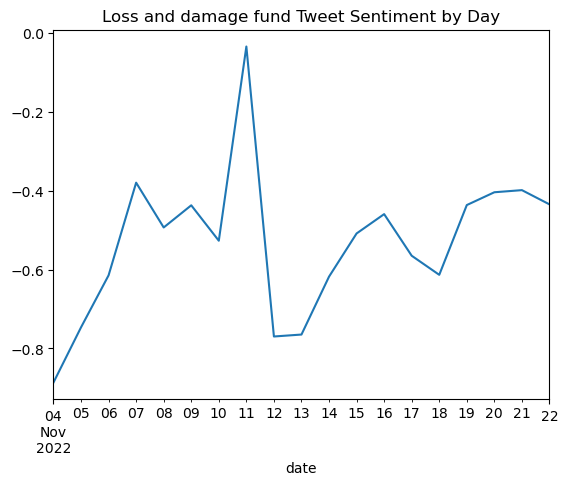

In [22]:
tweets_df_1.resample('D')['sentiment_score'].mean().plot(
    title="Loss and damage fund Tweet Sentiment by Day");

## Discussion

Our sentiment analysis of tweets related to COP27 and the loss and damage fund revealed several interesting insights. In general, the daily sentiment scores for tweets about COP27 were positive, indicating that the public had an overall favorable response to the conference. However, two specific dates – November 7th and November 20th – had notably lower sentiment scores of 0.13 and 0.15, respectively, compared to other dates with scores above 0.22.

The low sentiment score on November 20th, the last day of the conference, may be attributed to concerns about the lack of tangible outcomes from COP27. As the conference drew to a close, people may have expressed disappointment or anxiety about the effectiveness of the event and the actions agreed upon by the participating countries.

The low sentiment score on November 20th, the final day of COP27, could be further attributed to several factors. Firstly, the public may have been frustrated by the perceived lack of ambitious commitments by the participating countries, especially in light of the urgency of the climate crisis. Secondly, the conference may have concluded without addressing some key concerns, such as concrete measures for emissions reductions, adaptation finance, and technology transfer. Lastly, the media coverage on the final day might have been critical, highlighting the gaps between the conference's stated goals and its actual outcomes, leading to a negative public sentiment on social media.

The low sentiment score on November 7th, the second day of the conference, could be due to several reasons. Some possible explanations include:

Initial skepticism: People may have been skeptical about the potential for meaningful progress at the beginning of the conference, given past experiences with climate negotiations.

High expectations: The public may have had high expectations for COP27, and as the conference commenced, they may have been disappointed by the perceived slow pace or lack of immediate results.

Controversial news or events: Specific incidents or discussions taking place during the conference on November 7th may have led to negative reactions from the public.

In contrast, our analysis of tweets specifically related to the loss and damage fund revealed that the daily sentiment scores were negative, suggesting that people were generally pessimistic about the long-term effectiveness of the fund. This finding is particularly noteworthy, as it highlights a discrepancy between the overall positive sentiment towards COP27 and the negative sentiment towards the loss and damage fund.

Based on the sentiment analysis conducted, we can offer the following recommendations for future climate policy and communication strategies:

1. Transparency and accountability: Ensure that climate policies and commitments are transparent, measurable, and verifiable. Regular progress reports and updates should be made available to the public, fostering a sense of accountability among participating countries.
2. Clear communication: Simplify complex climate policies and terms to make them more accessible and understandable to the general public. Use various communication channels, such as social media, websites, and infographics, to disseminate information effectively.
3. Address public concerns: Identify and address public concerns and skepticism regarding climate policies, such as the loss and damage fund. Engage in open dialogues and discussions with the public to build trust and understanding.
4. Highlight successes: Share success stories and best practices from climate initiatives, showcasing tangible results and inspiring positive sentiments among the public.
5. Foster public engagement: Encourage public participation in climate-related discussions and decision-making processes. This could include hosting town hall meetings, surveys, or online forums where people can voice their opinions and concerns.
6. Collaborate with influencers and thought leaders: Partner with influencers, celebrities, and thought leaders to amplify climate messages and engage a wider audience. Their endorsement can help create a positive sentiment towards climate policies and actions.
7. Targeted messaging: Develop tailored communication strategies for different segments of the population. Address the unique concerns and interests of various groups, such as youth, business owners, and local communities, to foster a sense of inclusiveness and ownership.
8. Focus on solutions: Emphasize the solutions and opportunities provided by climate policies, such as green jobs, sustainable development, and improved quality of life. This can help generate optimism and support for climate initiatives.

By implementing these recommendations, policymakers and communicators can foster positive public sentiment towards climate policies, drive engagement, and ultimately, create a supportive environment for effective climate action.


## Conclusion

Our sentiment analysis of tweets connected to the UN COP27 meetings and the loss and damage fund has provided valuable insights into public sentiment towards these topics. While the overall sentiment towards COP27 was positive, specific dates such as November 7th and November 20th had notably lower sentiment scores, potentially due to concerns about the conference's outcomes and effectiveness.

Additionally, the consistently negative sentiment scores for tweets related to the loss and damage fund indicate that people are skeptical about the fund's long-term success. This finding underscores the need for policymakers, climate activists, and other stakeholders to address public concerns and improve communication about the fund's objectives and strategies.

In conclusion, sentiment analysis of tweets connected to climate change events, such as COP27, can provide crucial insights into public opinion and engagement. These insights can inform future climate policies, communication strategies, and actions to ensure that public concerns are addressed, and global efforts to tackle climate change are effective and well-supported.
